## Final Project Laboratorium Machine Learning - Group GaNi
#### Anggota Kelompok:
1. Daniel Andrew Ketaren	(211402062)
2. Sarmida Uli Sinaga		(211402071)
3. Muhammad Hatta Abdillah	(211402110)
4. Luthfi Muzhaffar	Lubis	(211402119)

#### Dataset : Singapore Housing & Development Board (HBD) Resale Price 
Link :  https://drive.google.com/file/d/15Xwkyf5IkQiCoNP1xbLgNbOKwfNi2P73/view

In [31]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score
from scipy import stats

# 1. Data cleansing

Ketentuan yang harus diikuti dalam melakukan filtering data di Dataset Singapore HDB Resale Price

1. Data dari kedua dataset disatukan
2. Data yang digunakan hanya dalam rentang 2016 - 2020, maka data selain rentang waktu 2015-2016 akan dihilangkan
3. Memperbaiki format kolom yang salah
4. Memperbaiki `missing values` dan `outlier` dengan cara cara yang tepat

Maka, langkah langkah yang harus dilakukan agar `filtering` data ini berjalan dengan baik, antara lain:

1. Melakukan penyatuan terhadap dua dataset yang diberikan sebelumnya, dengan tujuan agar kita dapat memanfaatkan kedua dataset dengan baik tanpa pemisahan
2. Melakukan `filtering` data dengan ketentuan kita hanya akan memakai data dari tahun 2016-2020
3. Melihat data setelah di`filter`
4. Menentukan kolom yang memiliki format yang salah
5. Mengubah kolom dengan format kolom yang salah itu tadi ke dalam format yang benar
6. Melihat data setelah diformat
7. Melihat `missing values` pada data
8. Jikalau ada `missing values` pada data, maka akan diimplementasikan metode metode yang cocok diterapkan untuk menangani `missing values`-nya
9. Melihat data setelah penanganan `missing values`
10. Mengecek `sum`, `min`, `max` dari setiap kolom pada dataset yang dapat dikalkulasikan
11. Melihat posibilitas data ada yang `outlier` atau tidak
12. Melihat data yang `outlier`
13. Menentukan apakah data yang `outlier` ini memanglah berdasar ataukah merupakan kesalahan dari inputan
14. Mengimplementasikan kesimpulan dari poin ke 13

In [4]:
# Data dari kedua dataset disatukan
csv1 = '2015-to-2016.csv'
csv2 = '2017-to-2020.csv'

df1 = pd.read_csv(csv1)
df2 = pd.read_csv(csv2)

df_combined = pd.concat([df1, df2], axis=0, ignore_index=True)

csv_combined = '2016-to-2020.csv'
df_combined.to_csv(csv_combined, index=False)

In [5]:
# Membaca data yang telah dicombine
df = pd.read_csv(csv_combined)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
117522,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,66 years 03 months,440000.0
117523,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,65 years 06 months,458000.0
117524,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,66 years 04 months,490000.0
117525,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,66 years 03 months,558000.0


In [6]:
# Memfilter data hanya 2016 sampai 2020 saja
# Penghapusan data
tahun_target = ['2015']
for i in range(len(df)):
    tahun = df['month'][i].split("-", 1)[0]
    
    if tahun in tahun_target:
        df = df.drop(i)

# Menghapus indeks data 2015
df = df.reset_index(drop=True)

# Kondisi data setelah data 2015 dihapus
df.to_csv('2016-to-2020.csv', index=False)

In [ ]:
# Melihat data yang sudah difilter
csv_combine = '2016-to-2020.csv'
df = pd.read_csv(csv_combine)

df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2016-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,62,230000.0
1,2016-01,ANG MO KIO,2 ROOM,116,ANG MO KIO AVE 4,01 TO 03,44.0,Improved,1978,61,240000.0
2,2016-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,01 TO 03,60.0,Improved,1986,69,276000.0
3,2016-01,ANG MO KIO,3 ROOM,560,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1980,63,280000.0
4,2016-01,ANG MO KIO,3 ROOM,258,ANG MO KIO AVE 4,01 TO 03,73.0,New Generation,1977,60,285000.0
...,...,...,...,...,...,...,...,...,...,...,...
99742,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,66 years 03 months,440000.0
99743,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,65 years 06 months,458000.0
99744,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,66 years 04 months,490000.0
99745,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,66 years 03 months,558000.0


In [7]:
# Menentukan kolom yang memiliki format yang salah
# Perubahan pada remaining_lease agar data yang memiliki format yy years mm months berubah menjadi yy saja
def transform_remaining_lease(lease):
    if pd.notna(lease):
        if lease.isdigit():
            return int(lease)
        elif 'year' in lease:
            years = int(lease.split()[0])
            return years
        elif 'month' in lease:
            years, months = map(int, lease.split()[:2])
            if months <= 6:
                return years
            else:
                return years + 1
    else:
        return np.nan

# Mengganti nilai pada kolom remaining_lease dengan nilai yang baru
df['remaining_lease'] = df['remaining_lease'].apply(transform_remaining_lease)

# Menampilkan hasil
print(df['remaining_lease'])

0        62
1        61
2        69
3        63
4        60
         ..
99742    66
99743    65
99744    66
99745    66
99746    66
Name: remaining_lease, Length: 99747, dtype: int64


In [28]:
# Melihat data setelah remaining_lease diubah
df

In [9]:
# Melihat missing values pada data
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

Dikarenakan tidak ada missing values yang terlihat pada dataset, maka kita tidak perlu melakukan penanganan terhadap missing values

In [10]:
# Mengecek sum, min, max, dan lain lain dari setiap kolom pada dataset yang dapat dikalkulasikan
df.describe()

,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
count,99747.000000,99747.000000,99747.000000,9.974700e+04
mean,97.552090,1993.602635,74.192216,4.392237e+05
std,24.251437,12.570580,12.512908,1.506651e+05
min,31.000000,1966.000000,45.000000,1.400000e+05
25%,81.000000,1984.000000,65.000000,3.300000e+05
50%,95.000000,1993.000000,74.000000,4.100000e+05
75%,112.000000,2002.000000,83.000000,5.100000e+05
max,259.000000,2019.000000,97.000000,1.258000e+06


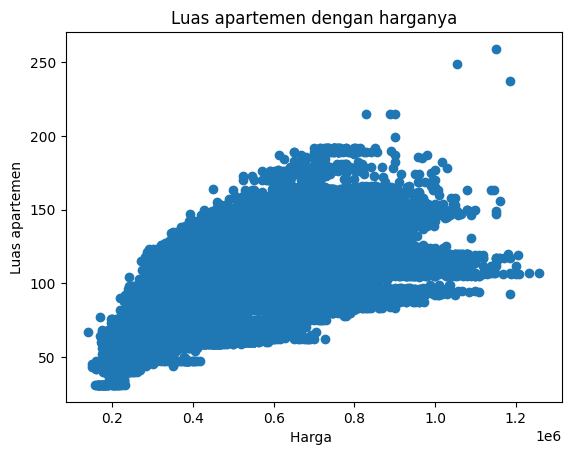

In [11]:
# Melihat posibilitas data ada yang outlier atau tidak
plt.scatter(df['resale_price'], df['floor_area_sqm'])
plt.title('Luas apartemen dengan harganya')
plt.xlabel('Harga ')
plt.ylabel('Luas apartemen')
plt.show()

Maka dapat dilihat bahwa ada sekitar 3 data yang sangat jauh dari kelompoknya, dan 3 data tersebut ada di kanan atas, yang memiliki arti harga yang mahal dan memiliki luas apartemen yang besar. Maka, yang harus dilakukan selanjutnya adalah melihat data yang diduga outliers tersebut, apakah outlier disebabkan kesalahan inputan atau memang ditetapkan harganya demikian.

Kita akan melakukan pengecekan data yang outlier dengan menggunakan metode IQR (Interquartile Range) atau rentang akar kuartil dari sekumpulan data. IQR digunakan untuk membantu menarik kesimpulan tentang data.

In [12]:
# Menghitung nilai IQR pada floor_area_sqm
Q1 = df['floor_area_sqm'].quantile(0.25) #kuartil 1
Q3 = df['floor_area_sqm'].quantile(0.75) #kuartil 3
IQR = Q3 - Q1

print('Q1 = ', Q1)
print('Q3 = ', Q3)
print('IQR wheel base = ', IQR)

Q1 =  81.0
Q3 =  112.0
IQR wheel base =  31.0


In [13]:
# Memeriksa outlier seluruh kolom yang bertipekan int64 dan float64
for i in (df.columns):
    if(df[i].dtypes in ['int64', 'float64']):
        print(i, ' : ', df[i].dtypes)

        Q1 = df[i].quantile(0.25) #kuartil 1
        print('Q1 = ', Q1)

        Q3 = df[i].quantile(0.75) #kuartil 3
        print('Q3 = ', Q3)

        IQR = Q3 - Q1
        print('IQR wheel base = ', IQR)

        nilai_minimum = df[i].min()
        nilai_maximum = df[i].max()

        minimum_IQR = Q1 - 3.5 * IQR
        maximum_IQR = Q3 + 3.5 * IQR

        if(nilai_minimum < minimum_IQR):
            print('Low outlier ditemukan <', minimum_IQR)
            print('Indeks dari low outlier : ', list(df[df[i] < minimum_IQR].index)) # indeks low outlier

        if(nilai_maximum > maximum_IQR):
            print('High outlier ditemukan >', maximum_IQR)
            print('Indeks dari high outlier : ', list(df[df[i] > maximum_IQR].index)) # indeks high outlier

        print('\n')

floor_area_sqm  :  float64
Q1 =  81.0
Q3 =  112.0
IQR wheel base =  31.0
High outlier ditemukan > 220.5
Indeks dari high outlier :  [18710, 39066, 55149]


lease_commence_date  :  int64
Q1 =  1984.0
Q3 =  2002.0
IQR wheel base =  18.0


remaining_lease  :  int64
Q1 =  65.0
Q3 =  83.0
IQR wheel base =  18.0


resale_price  :  float64
Q1 =  330000.0
Q3 =  510000.0
IQR wheel base =  180000.0
High outlier ditemukan > 1140000.0
Indeks dari high outlier :  [18710, 20702, 30227, 42616, 43102, 51200, 53879, 55149, 56633, 60304, 61219, 61816, 62223, 62720, 64497, 66332, 69160, 70382, 72887, 73137, 74371, 87678, 90515, 91489, 95378, 97851, 97853, 98838]




Maka dapat dilihat bahwa memang hanya resale_price dan floor_area_sqm sajalah yang memiliki outlier, dimana:

1. floor_area_sqm hanya memiliki high outlier, dan
2. resale_price hanya memiliki high outlier

Kemudian, kita akan melihat data yang outlier dari masing masing kolom yang memiliki outlier:

In [14]:
# Melihat data high outlier pada kolom floor_area_sqm
df.iloc[[18710, 39066, 55149]]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
18710,2016-12,KALLANG/WHAMPOA,3 ROOM,57,JLN MA'MOR,01 TO 03,259.0,Terrace,1972,54,1150000.0
39066,2017-12,KALLANG/WHAMPOA,3 ROOM,65,JLN MA'MOR,01 TO 03,249.0,Terrace,1972,53,1053888.0
55149,2018-09,KALLANG/WHAMPOA,3 ROOM,41,JLN BAHAGIA,01 TO 03,237.0,Terrace,1972,52,1185000.0


Dari data yang ada diatas, kami menyimpulkan bahwa sebenarnya data floor_area_sqm yang tergolong high outlier bukan disebabkan oleh kesalahan inputan, namun memang adalah luas permeter yang sesuai dengan kondisi apartemen terrace pada umumnya. Maka tidak ada alasan untuk menghapus data tersebut.

Seperti yang diketahui, apatemen model terrace memang cenderung lebih luas dibandingkan apartemen model lain, hal ini disebabkan karena apartemen model ini memiliki halaman depan untuk bersantai seperti di rumah, sehingga semakin memperluas ukuran lantai.

In [15]:
# Melihat data high outlier pada kolom resale_price
df.iloc[[18710, 20702, 30227, 42616, 43102, 51200, 53879, 55149, 56633, 60304, 61219, 61816, 62223, 62720, 64497, 66332, 69160, 70382, 72887, 73137, 74371, 87678, 90515, 91489, 95378, 97851, 97853, 98838]]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
18710,2016-12,KALLANG/WHAMPOA,3 ROOM,57,JLN MA'MOR,01 TO 03,259.0,Terrace,1972,54,1150000.0
20702,2017-02,BISHAN,5 ROOM,273B,BISHAN ST 24,40 TO 42,120.0,DBSS,2011,93,1180000.0
30227,2017-07,QUEENSTOWN,EXECUTIVE,148,MEI LING ST,19 TO 21,156.0,Apartment,1995,77,1160000.0
42616,2018-03,CENTRAL AREA,5 ROOM,1B,CANTONMENT RD,37 TO 39,107.0,Type S2,2011,91,1145000.0
43102,2018-03,KALLANG/WHAMPOA,5 ROOM,7,BOON KENG RD,40 TO 42,117.0,DBSS,2011,91,1150000.0
51200,2018-07,QUEENSTOWN,EXECUTIVE,148,MEI LING ST,19 TO 21,149.0,Apartment,1995,76,1150000.0
53879,2018-08,TOA PAYOH,5 ROOM,139A,LOR 1A TOA PAYOH,40 TO 42,117.0,DBSS,2012,92,1160888.0
55149,2018-09,KALLANG/WHAMPOA,3 ROOM,41,JLN BAHAGIA,01 TO 03,237.0,Terrace,1972,52,1185000.0
56633,2018-10,CENTRAL AREA,5 ROOM,1D,CANTONMENT RD,40 TO 42,106.0,Type S2,2011,91,1168000.0
60304,2018-12,BUKIT MERAH,5 ROOM,9A,BOON TIONG RD,37 TO 39,112.0,Improved,2016,96,1150000.0


Dari data yang ada diatas, kami menyimpulkan bahwa sebenarnya data resale_price yang tergolong high outlier bukan disebabkan oleh kesalahan inputan, namun memang adalah harga yang sebenarnya dari apartemen tersebut. Maka tidak ada alasan untuk menghapus data tersebut.

Hal ini didasari pada sebagian besar data yang diduga outlier pada kolom resale_price tersebut termasuk dalam golongan yang memiliki ruangan yang banyak, didoinasi oleh 5 room, dan sebagian lainnya termasuk pada tipe eksekutif. Maka tidak heran jikalau harganya tinggi.

Kesimpulan dari mencari posibilitas data outlier ini adalah bahwa data data yang ditemukan terindikasi outlier ternyata bukanlah merupakan data yang mengalami kesalahan penulisan, melainkan adalah data sebenarnya dan masih terlihat masuk akal untuk nilainya, hal itu yang membuat kami tidak memiliki niatan yang mendesak untuk menghapus data data yang terindikasi outlier tersebut.

# 2. Exploratory Data Analysis (EDA)